In [16]:
pip install pandas numpy yfinance keras tensorflow ucimlrepo sns

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2644 sha256=f7e1b993660402b82247a531ca568e3073bdc5696c47159733f2e5fb70da3088
  Stored in directory: c:\users\aditya uni\appdata\local\pip\cache\wheels\7c\e1\f6\7f1e51e342bccba75ac6cfae60918407acaa6999034889d25e
Successfully built sns
Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import seaborn as sns

## Import the data frame

In [13]:
df = pd.read_csv('student-por.csv', delimiter=';')
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

## Understand the columns to keep
**School:** The School the student attends can influence their academic performance due to differences in resources, teaching quality, and environment

**Sex:** Gender differences can sometimes affect academic performance due to various social and psychological factors

**Age:** The age of the student might be relevant, especially if older students have different responsibilities or maturity levels affecting their grades

**Address:** Whether a student lives in an urban or rural area can impact their access to educational resources and opportunities

**Famsize:** Family size might impact a student’s academic performance due to the amount of attention and support they receive at home.

**Pstatus:** Parent’s cohabitation status might affect a student’s performance due to differences in household stability and support.

**Medu:** Mother’s education level could influence the academic environment and support a student receives at home.

**Fedu:** Father’s education level, similar to the mother’s education, could impact the support and resources available to the student.

**Mjob:** Mother’s job might indicate socio-economic status and the amount of time she can dedicate to helping the student.

**Fjob:** Father’s job, similar to the mother’s job, can indicate socio-economic status and available support.

**Reason:** The reason for choosing the school might reflect the student’s and family’s priorities and values regarding education.

**Guardian:** The primary guardian can impact the level of support and supervision the student receives.

**Traveltime:** The time taken to travel to school can affect a student’s energy levels and time available for study.

**Studytime:** The amount of time dedicated to study each week directly impacts academic performance.

**Failures:** The number of past class failures can be an indicator of academic struggles.

**Schoolsup:** Extra educational support provided by the school can help improve academic performance.

**Famsup:** Family support for education can be crucial for academic success.

**Paid:** Extra paid classes in core subjects can provide additional learning support.

**Activities:** Participation in extra-curricular activities might affect academic performance either positively (through well-rounded development) or negatively (through time management challenges).

**Nursery:** Attendance at nursery school might be an early indicator of a supportive learning environment.

**Higher:** The aspiration to pursue higher education can motivate better academic performance.

**Internet:** Access to the internet at home is crucial for modern educational resources and support.

**Romantic:** Having a romantic relationship can affect the time and energy a student devotes to studies.

**Famrel:** The quality of family relationships can impact emotional support and academic performance.

**Freetime:** The amount of free time after school can influence how much time a student has for homework and study.

**Goout:** Frequency of going out with friends can impact study time and focus on academics.

**Dalc:** Workday alcohol consumption can affect academic performance through its impact on health and cognition.

**Walc:** Weekend alcohol consumption, similar to workday consumption, can impact health and academic performance.

**Health:** General health status can affect energy levels, attendance, and ability to concentrate on studies.

**Absences:** Number of school absences directly affects learning and academic performance.

**G1: First period grade provides an early indicator of academic performance.**

**G2: Second period grade, like G1, is an important indicator of performance leading up to the final grade.**

**G3: Final grade, the target variable for prediction.**

In [15]:
columns_to_keep = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 
    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

df = df[columns_to_keep]
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Convert categorical variables into numerical form using one hot encoding

In [32]:
df_encoded = pd.get_dummies(df, columns=['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
df_encoded.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,F,18,4,4,2,2,0,4,3,4,...,True,False,False,True,False,True,True,False,True,False
1,F,17,1,1,1,2,0,5,3,3,...,True,False,True,False,False,True,False,True,True,False
2,F,15,1,1,1,2,0,4,3,2,...,True,False,False,True,False,True,False,True,True,False
3,F,15,4,2,1,3,0,3,2,2,...,False,True,False,True,False,True,False,True,False,True
4,F,16,3,3,1,2,0,4,3,2,...,True,False,False,True,False,True,True,False,True,False


## Split the features and the target variable

In [33]:
x = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

x.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,F,18,4,4,2,2,0,4,3,4,...,True,False,False,True,False,True,True,False,True,False
1,F,17,1,1,1,2,0,5,3,3,...,True,False,True,False,False,True,False,True,True,False
2,F,15,1,1,1,2,0,4,3,2,...,True,False,False,True,False,True,False,True,True,False
3,F,15,4,2,1,3,0,3,2,2,...,False,True,False,True,False,True,False,True,False,True
4,F,16,3,3,1,2,0,4,3,2,...,True,False,False,True,False,True,True,False,True,False


## Split the data into training and testing data

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Standardize numerical features

In [36]:
scaler = StandardScaler()
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

In [38]:
print(x_train.dtypes)

sex                   object
age                  float64
Medu                 float64
Fedu                 float64
traveltime           float64
studytime            float64
failures             float64
famrel               float64
freetime             float64
goout                float64
Dalc                 float64
Walc                 float64
health               float64
absences             float64
G1                     int64
G2                     int64
school_GP               bool
school_MS               bool
address_R               bool
address_U               bool
famsize_GT3             bool
famsize_LE3             bool
Pstatus_A               bool
Pstatus_T               bool
Mjob_at_home            bool
Mjob_health             bool
Mjob_other              bool
Mjob_services           bool
Mjob_teacher            bool
Fjob_at_home            bool
Fjob_health             bool
Fjob_other              bool
Fjob_services           bool
Fjob_teacher            bool
reason_course 

In [41]:
x_train['sex'] = x_train['sex'].map({'F': 0, 'M': 1})
x_test['sex'] = x_test['sex'].map({'F': 0, 'M': 1})

## Creating the model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

## Evaluate the model

In [44]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.475952141560041
R-squared: 0.848646930946065


## Plotting graph of actual vs predicted final grades

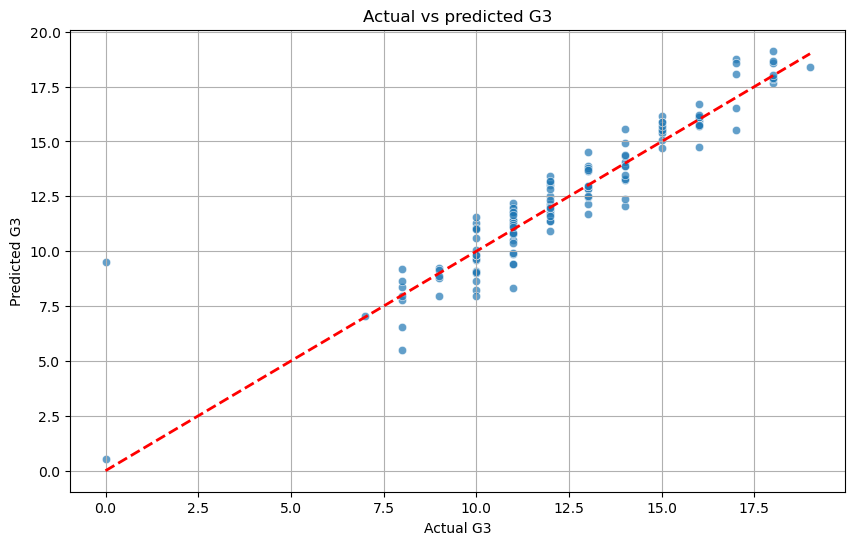

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs predicted G3')
plt.grid(True)
plt.show()

## Plotting a line graph for the same

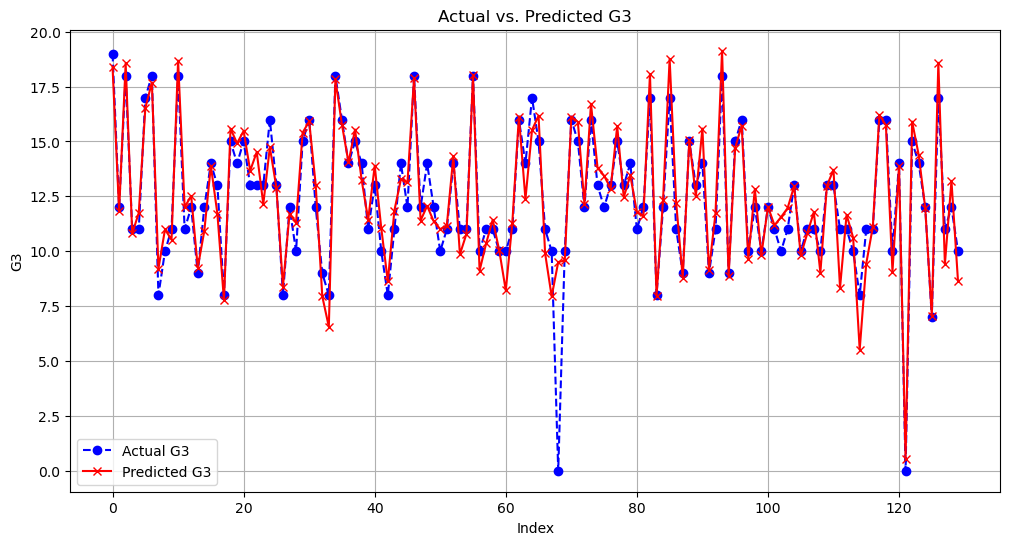

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual G3', color='blue', linestyle='--', marker='o')
plt.plot(pd.Series(y_pred), label='Predicted G3', color='red', linestyle='-', marker='x')
plt.xlabel('Index')
plt.ylabel('G3')
plt.title('Actual vs. Predicted G3')
plt.legend()
plt.grid(True)
plt.show()

## Create a random forest model to understand how much a factor affects the final grade of a student

In [54]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

## Create the random forest model

In [55]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## Get the feature importances

In [56]:
importances = rf_model.feature_importances_
feature_names = x.columns

## Create the dataframe to plot

In [57]:
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

## Plot the graph

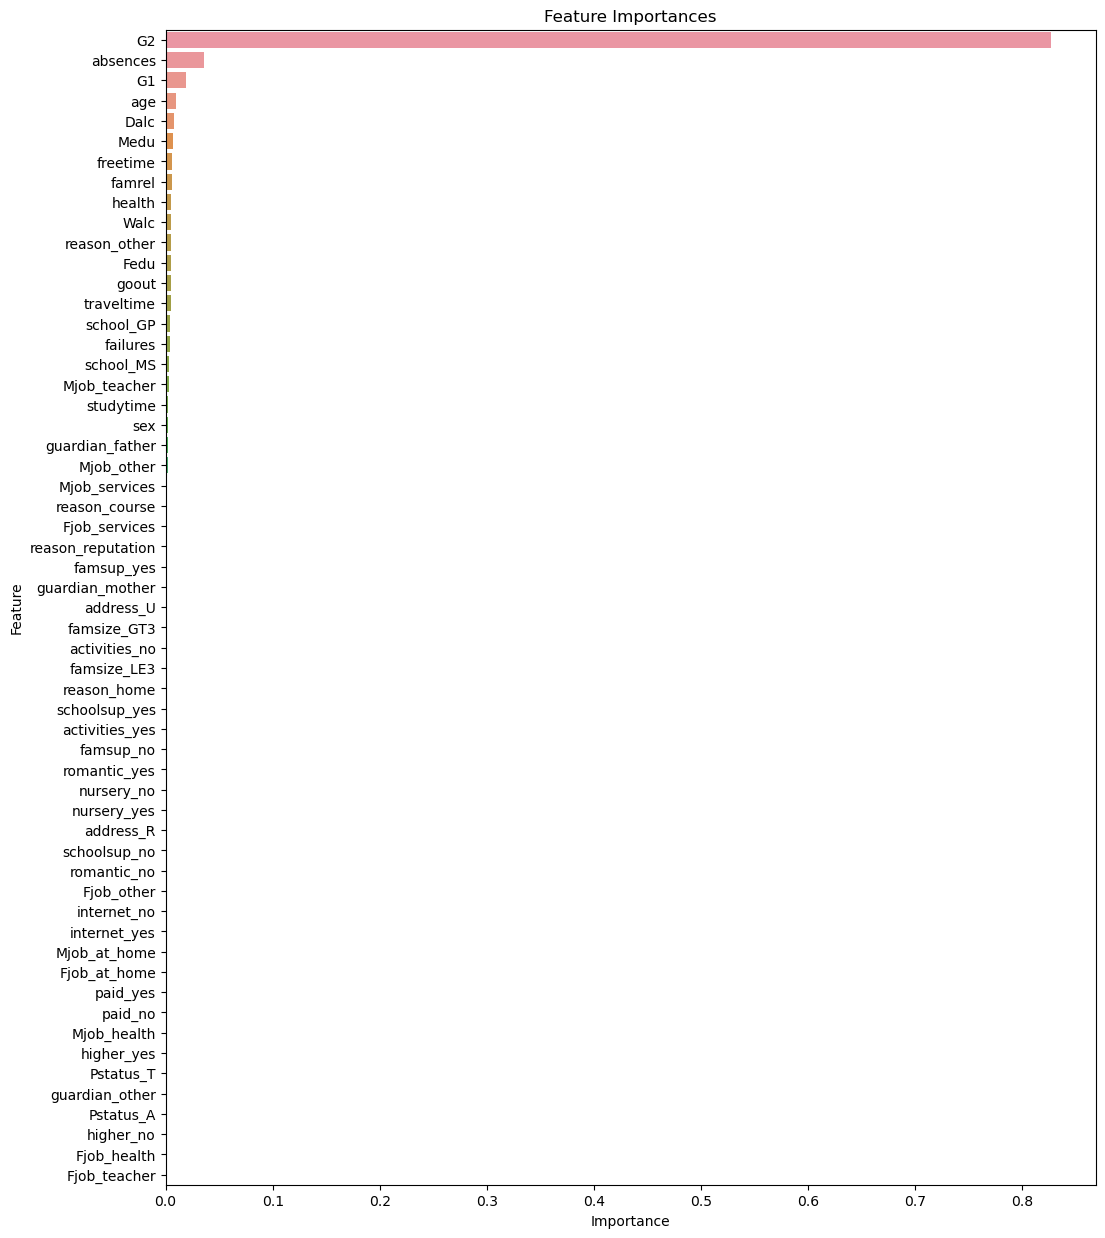

In [70]:
plt.figure(figsize=(12, 15))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Conclusion:

**From the above graphs, it can be concluded that the your final grade in an exam is most affected by the marks you've gained in the exam previous to it, in this case G2 (Grade 2) has influenced a students final grade the most**